# ECE 47300 Assignment 4
Name:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Exercise 1 (20 points)
In this exercise, you will optimize a few simple functions where the gradients can be easily manually derived by hand.

## Exercise 1.1
For each function below, implement the `__call__` method which should evaluate the corresponding function and the `gradient` method which should compute the gradient of the function evaluated at the input $x$. We give a simple linear example ($5x$).

1. $5x^2 - 3x + 2$
2. $\exp(x) - x$
3. $x - \log x$ (Note this is only valid for x > 0; in the `__call__` function, raise error if negative value is given by using ValueError with a message "The input x should be positive.")

In [ ]:
class Linear(): # This is the example
    def __call__(self, x):
        return 5*x

    def gradient(self, x):
        return 5

class Function1(): #
    def __call__(self, x):
        # your code

    def gradient(self, x):
        # your code

class Function2(): #
    def __call__(self, x):
        # your code

    def gradient(self, x):
        # your code

class Function3(): #
    def __call__(self, x):
        # your code

    def gradient(self, x):
        # your code


In [ ]:
# Evaluation part
func1 = Function1()
func2 = Function2()
func3 = Function3()

for x in [2, 0.4, -1]:
    if x >= 0:
        print(f"======= x={x} =======")
        print("func1 call:", "{:.2f}".format(func1(x)))
        print("func2 call:", "{:.2f}".format(func2(x)))
        print("func3 call:", "{:.2f}".format(func3(x)))

        print("func1 gradient:", "{:.2f}".format(func1.gradient(x)))
        print("func2 gradient:", "{:.2f}".format(func2.gradient(x)))
        print("func3 gradient:", "{:.2f}".format(func3.gradient(x)))
    else:
        print(f"======= x={x} =======")
        print("(The code should raise an error with the message \"The input x should be positive.\".)")
        gave_err = False
        try:
            y = func3(x)
            print('Did not produce an error for negative')
        except Exception as e:
            gave_err = True
            print('Correctly produced an error for negative')
            print(f"Message: {e}")

## Exercise 1.2
Implement gradient descent on $x$ to numerically find the minimum of these functions starting at $x=1.5$ with a step size of 0.1. In the iteration loop, **print the updated x value every 10 iteration.**

In [ ]:
starting_point = 1.5
step_size = 0.1
n_iter = 50

print("====== func1 ======")
x = starting_point

# your code

print(f"minimum of func1 after {n_iter} iterations:", "{:.2f}".format(func1(x)))
print("\n")

print("====== func2 ======")
x = starting_point

# your code

print(f"minimum of func2 after {n_iter} iterations:", "{:.2f}".format(func2(x)))
print("\n")

print("====== func3 ======")
x = starting_point

# your code

print(f"minimum of func3 after {n_iter} iterations:", "{:.2f}".format(func3(x)))

### Expected Output ###
# ====== func1 ======
# x in 10-th step: 0.30
# ...
# x in 50-th step: 0.30
# minimum of func1 after 50 iterations: 1.55
# ...
#

# Exercise 2
In this exercise, you will optimize and compare different versions of binary classifiers using variants of gradient descent.

## Exercise 2.1 (30 points)
You will implement the several classification objectives, corresponding gradients and prediction functions. These will be the fundamental building blocks for creating your gradient descent algorithms in the next exercise.

We will generalize logistic regression to a more general framework for linear classification models. We will break the problem down into two parts. The first part is the linear projection part (i.e., reduce to a single dimension) that can be formalized as $\hat{z} = \theta^T \mathbf{x}$, where $\mathbf{x} \in \mathbb{R}^{d+1}$ is a instance vector of length $d$ where we concatenate with a 1 to account for the intercept/bias term.

The second part is applying a loss function $\ell(y,\hat{z})$ that computes a loss given the true label $y$ and a predicted "score" $z\in\mathbb{R}$ from the first step. You will implement 3 different versions of $\ell$ in the `__call__` method of each class (Note: You will need to compute $\hat{z}$ first from the input $\mathbf{x}$ and model parameters $\theta$ and then apply this loss function).

1. $\ell(y,\hat{z}) = (y-\hat{z})^2$ (Squared error used in ordinary least squared linear regression)
2. $\ell(y,\hat{z}) = -y \log \sigma(\hat{z}) - (1-y)\log (1-\sigma(\hat{z}))$ (Logistic regression loss)
3. $\ell(y,\hat{z}) = \max \{0, 1-(2y-1)\hat{z}\}$ (Hinge loss of support vector machines (SVM) modified for $y\in \{0,1\}$)

The gradients for each of these w.r.t. a single sample $\mathbf{x}$ should be implemented in the `gradient` method:

1. $\nabla_{\theta} \ell(y, \theta^T \mathbf{x}) = 2(y-\theta^T\mathbf{x})(-\mathbf{x}) = -2(y-\theta^T\mathbf{x})\mathbf{x}$
2. $\nabla_{\theta} \ell(y, \theta^T \mathbf{x}) = -(y-\sigma(\theta^T\mathbf{x})) \mathbf{x}$
3. $\nabla_{\theta} \ell(y, \theta^T \mathbf{x}) = \begin{cases} -(2y-1)\mathbf{x}, & \text{if } (2y-1)\theta^T\mathbf{x} < 1 \\ \textbf{0}, & \text{otherwise} \end{cases}$

Finally, for each loss function, there is a different threshold for $\hat{z}$ to predict class 1 vs class 0. We give the predicted class given only $\hat{z}$ for each loss function, which should be implemented in the `predict` method:

1. $\hat{y} = \begin{cases} 1, & \text{if } \hat{z} \geq 0.5 \\ 0, & \text{otherwise} \end{cases}$
2. $\hat{y} = \begin{cases} 1, & \text{if } \hat{z} \geq 0, \text{ (or equivalently } \sigma(\hat{z}) \geq 0.5 \text{)} \\ 0, & \text{otherwise} \end{cases}$
3. $\hat{y} = \begin{cases} 1, & \text{if } \hat{z} \geq 0 \\ 0, & \text{otherwise} \end{cases}$

Implement each of these in a **vectorized way** (without for loops) such that it can take in a parameter vector $\theta$ called `theta`, the input value matrix $X\in\mathbb{R}^{n \times (d+1)}$ called `X`, and the corresponding label vector $y$ called `y` (except the predict method which should only take in the parameters and input). Note that in almost all cases, you will need to compute $\hat{z} = \theta^T \mathbf{x}$ (or in vectorized form for multiple samples at once $\hat{\mathbf{z}} = X\theta$) as a first step before doing further calculations. A few further hints:

Hint 1: You will need to use numpy broadcasting rules to implement in a vectorized way. Please read  https://numpy.org/doc/stable/user/basics.broadcasting.html to understand broadcasting rules. This will enable you to avoid loops in your code. In particular, for the gradient calculations, you will need to apply a scaling to each row of `X` before taking an average to get the final gradient.  Suppose you have a scaling 1D array (i.e., vector) `a` with shape `(n,)` and you want to scale each row of `X` which has shape `(n,D)`. You cannot do `a * X` because the rightmost dimensions do not match and neither is 1 (see broadcasting documentation).  Instead, you can do **`a.reshape(-1, 1) * X`** (see https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html). This will fit the broadcasting rules because after the reshape because `a.reshape(-1,1)` will now have shape `(n,1)` and `X` has shape `(n,D)` so the broadcasting rules will apply and the scaling will be applied to each row of `X`.

Hint 2: When you take a mean of the per-sample gradients, you should make sure to use the `axis` parameter to take a mean over a particular axis. For example, if A = `[[1, 2, 3], [4, 5, 6]]` is an array of shape `(2,3)`, then the value of `np.mean(A, axis = 0)` will be `[2.5, 3.5, 5.5]` having shape `(3,)` and the value of `np.mean(A, axis = 1)` will be `[2, 5]` having shape `(2,)`. Without the `axis` parameter, the mean will take a mean over the entire matrix yielding a scalar value.

Hint 3: For the `predict` function, you can just use the `>=` operator on a whole vector. This will produce a boolean vector with only True and False values (or equivalently 0 and 1 values).

Hint 4: For the gradient of the hinge loss, you can use a boolean mask for rows that satisfy the condition and use it to filter only the non-zero gradients.

In [ ]:
class SquaredError():
    def __call__(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - scalar value of average loss
        """
        # your code (Should return a scalar loss value)

    def gradient(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - Array of shape (D+1,), the gradient vector
        """
        # your code (Should return a gradient vector the same shape as theta)

    def predict(self, theta, X):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix

        Returns:
            - Array of shape (n,), the predictions vector
        """
        # your code (Should return a vector of predictions for each row of X)


class LogisticLoss():
    def __init__(self):
        self.sigmoid = lambda x: 1 / (1 + np.exp(-x)) # For your convenience.

    def __call__(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - scalar value of average loss
        """
        # your code

    def gradient(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - Array of shape (D+1,), the gradient vector
        """
        # your code

    def predict(self, theta, X):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix

        Returns:
            - Array of shape (n,), the predictions vector
        """
        # your code


class HingeLoss():
    def __call__(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - scalar value of average loss
        """
        # your code

    def gradient(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - Array of shape (D+1,), the gradient vector
        """
        # your code (No for loop here)

    def predict(self, theta, X):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix

        Returns:
            - Array of shape (n,), the predictions vector
        """
        # your code


In [ ]:
X, y = load_iris(return_X_y=True)

# It has 3 classes: 0, 1, 2. We are going to use only two classes.
X = X[y<2]
y = y[y<2]
n, D = X.shape

# Increase one more dimension of X for interecept term,
#  i.e., (n, D) => (n, D+1).
X = np.concatenate((X, np.ones((n, 1))), axis=1)
rng = np.random.RandomState(0)
theta = rng.randn(D + 1)

# Evaluation
for f in [SquaredError(), LogisticLoss(), HingeLoss()]:
    loss = f(theta, X, y)
    grad = f.gradient(theta, X, y)
    idx = [1,2,3,-1,-2,-3]
    pred = f.predict(theta, X[idx, :])
    print(f"{f.__class__.__name__} : {loss}")
    print(f"Gradient: {grad}")
    print("Predictions for first 3 and last 3 (might be all 1s): ", pred.astype(int) )
    print(f"Gradient shape correct? {np.all(grad.shape == theta.shape)}")
    print(f"Prediction shape correct? {len(pred.shape) == 1 and np.all(pred.shape[0] == len(idx))}\n")

### Expected Output ###
# SquaredError : 292.4113612618828
# ...
#
# LogisticLoss : 7.026159389881265
# ...
#
# HingeLoss : 7.5261588020565435
# Gradient: [2.503 1.714 0.731 0.123 0.5  ]
# ...
#

## Exercise 2.2 (50 points)
Given your objective and gradient implementations above, implement mini-batch GD in the following function (if `batch_size` is `None`, this defaults to GD). You should track the average objective and training accuracy after every iteration and append to `obj_arr` and `acc_arr` respectively. The average objective in each iteration can be calculated by taking the average over batches of the mean losses for each batch. Accuracy can be obtained based on the total number of correct predictions in each iteration over all the batches. Return the best theta (in terms of accuracy). We have provided code to shuffle and batch the input data, a skeleton for the optimize function, and evaluation code to plot your results. See code comments for a few more details.

You should expect to get high accuracy and low loss values after 100 epochs if you have implemented the objectives, gradients, and optimize function correctly. The expected accuracy and loss values for the first and last epoch in the case of SquaredError are provided in the comments as a reference. Moreover, the expected accuracy plots for the different objective functions are also provided below for your reference.

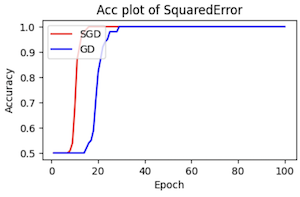
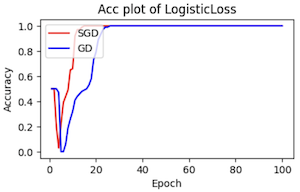
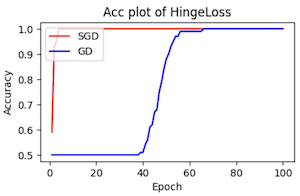

In [ ]:
def shuffle_and_batch(X, y, batch_size, rng):
    """Splits both X and y into nearly equal batches"""
    assert X.shape[0] == y.shape[0], 'X and y should have the same number of elements'
    # Shuffle data
    shuffled_idx = rng.permutation(X.shape[0])
    X = X[shuffled_idx, :]
    y = y[shuffled_idx]
    # Split into batches based on batch_size
    X_batches = np.asarray(np.array_split(X, np.ceil(X.shape[0] / batch_size), axis=0))
    y_batches = np.asarray(np.array_split(y, np.ceil(y.shape[0] / batch_size), axis=0))
    return X_batches, y_batches

In [ ]:
def optimize(theta_init, X_raw, y_raw, obj_func, step_size=1,
             max_epoch=100, batch_size=None, rng = None):
    obj_arr = []
    acc_arr = []
    batch_size = batch_size if batch_size is not None else len(X_raw)

    if rng is None:
        rng = np.random.RandomState(42)

    theta = theta_init.copy()
    best_acc = 0
    best_theta = theta
    for i in range(max_epoch): # epoch
        # Create list of batches for both X and y,
        # X_batches[0] has shape (batch_size, D) and y_batches[0] has shape (batch_size,)
        X_batches, y_batches = shuffle_and_batch(X_raw, y_raw, batch_size, rng)

        loss_for_each_epoch = 0 # total loss for the epoch
        num_correct = 0 # number of correct predictions for the epoch
        ######## Start your code ########
        # Loop through batches, update theta,
        #  and keep a running loss and running count of correct to
        #  calculate average loss and accuracy after each epoch


        # After each pass through the data (i.e., an epoch),
        #  save average objective and accuracy for the epoch,
        #  and update the best theta if needed (i.e., if
        #  current theta is better than best in terms of accuracy)


        ######## End your code ########
        # Display average objective and accuracy for the first and the last epoch
        if i == 0 or i == max_epoch - 1:
            print(f'Epoch: {i+1}, Average Loss: {obj_arr[i]:.6f}, Accuracy: {acc_arr[i]}')

    return best_theta, obj_arr, acc_arr

In [ ]:
# Code to run algorithm and plot the loss/accuracy
# Step sizes have been preselected to be reasonable
obj_func_arr = [SquaredError(), LogisticLoss(), HingeLoss()]
step_sizes = [
    [5e-4, 1e-4],
    [5e-2, 1e-2],
    [1e-2, 5e-2],
]

# Intialize random number generator
rng = np.random.RandomState(42)

for obj_func, step_size_arr in zip(obj_func_arr, step_sizes): # 0.005, 0.001 for SquaredError, LogisticLoss, HingeLoss
    print(f'======= {obj_func.__class__.__name__} =======')
    theta_init = rng.randn(D + 1)

    print(f'-> Running Gradient Descent')
    best_theta, obj_arr, acc_arr = optimize(
        theta_init, X, y, obj_func,
        step_size=step_size_arr[0], max_epoch=100, batch_size=None, rng = rng)
    print(f'\nBest theta: {best_theta}\n')

    print(f'-> Running Mini-Batch Gradient Descent (Batch Size = 10)')
    best_theta_sgd, obj_arr_sgd, acc_arr_sgd = optimize(
        theta_init, X, y, obj_func,
        step_size=step_size_arr[1], max_epoch=100, batch_size=10, rng = rng)
    print(f'\nBest theta_sgd: {best_theta_sgd}')
    print('')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2.5))
    ax1.set_title(f"Loss plot of {obj_func.__class__.__name__}")
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.plot(np.arange(1, len(obj_arr)+1), obj_arr_sgd, color ="red", label="SGD")
    ax1.plot(np.arange(1, len(obj_arr)+1), obj_arr, color ="blue", label="GD")
    ax1.legend(loc="upper left")
    ax2.set_title(f"Acc plot of {obj_func.__class__.__name__}")
    ax2.set(xlabel="Epoch", ylabel="Accuracy")
    ax2.plot(np.arange(1, len(acc_arr)+1), acc_arr_sgd, color ="red", label="SGD")
    ax2.plot(np.arange(1, len(acc_arr)+1), acc_arr, color ="blue", label="GD")
    ax2.legend(loc="upper left")

### Expected output ###
# ======= SquaredError =======
# -> Running Gradient Descent
# Epoch: 1, Average Loss: 21.537518, Accuracy: 0.5
# Epoch: 100, Average Loss: 0.644639, Accuracy: 1.0
# ...
# -> Running Mini-Batch Gradient Descent (Batch Size = 10)
# Epoch: 1, Average Loss: 21.400022, Accuracy: 0.5
# Epoch: 100, Average Loss: 0.449607, Accuracy: 1.0
# ...
#